- 데이터 : 캘리포이나 주택 문제

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
housing = tf.keras.datasets.california_housing.load_data()
data = housing[0][0]
target = housing[0][1]

In [13]:
target

array([252300., 146900., 290900., ..., 500001., 499000., 238100.],
      dtype=float32)

In [14]:
data.shape

(16512, 8)

In [48]:
input_wide = tf.keras.layers.Input(shape=[5]) # 5  index : 0~4
input_deep = tf.keras.layers.Input(shape=[6]) # 6  index: 2 ~ 7

norm_wide_layer =  tf.keras.layers.Normalization()
norm_deep_layer = tf.keras.layers.Normalization()

h1 = tf.keras.layers.Dense(30,activation="relu")
h2 = tf.keras.layers.Dense(30,activation="relu")

concat = tf.keras.layers.Concatenate()
output = tf.keras.layers.Dense(1)

# 결합
input_w = input_wide
norm_wide = norm_wide_layer(input_w)

input_d = input_deep
x = norm_deep_layer(input_d)
x = h1(x)
x = h2(x)
con = concat([x,norm_wide])
out = output(con)

model = tf.keras.Model(inputs=[input_d,input_w],outputs=out)

In [49]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_8           │ (None, 6)              │             13 │ input_layer_11[0][0]   │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 30)             │            210 │ normalization_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_10            │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 30)             │            930 │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_7           │ (None, 5)              │             11 │ input_layer_10[0][0]   │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 35)             │              0 │ dense_16[0][0],        │
│ (Concatenate)             │                        │                │ normalization_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 1)              │             36 │ concatenate_5[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [50]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mse",optimizer=optimizer,metrics=["mae","RootMeanSquaredError"])

In [51]:
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test = train_test_split(data,target,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train_full,y_train_full,test_size=0.2,random_state=42)


X_wide,y_wide = x_train[:,:5], y_train[:5]  # 0 ~ 4
X_deep,y_deep = x_train[:,2:], y_train[2:] # 2 ~7

In [52]:
history = model.fit([X_deep,X_wide],y_train,epochs=50,validation_data=([x_val[:,2:],x_val[:,:5]],y_val) )

Epoch 1/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 227369.1562 - loss: 51796545536.0000 - mae: 195295.4062 - val_RootMeanSquaredError: 172120.3750 - val_loss: 29625423872.0000 - val_mae: 124582.2656
Epoch 2/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 166883.6562 - loss: 27862173696.0000 - mae: 121504.6406 - val_RootMeanSquaredError: 173004.9062 - val_loss: 29930698752.0000 - val_mae: 122215.2656
Epoch 3/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 166530.4062 - loss: 27740356608.0000 - mae: 119925.2109 - val_RootMeanSquaredError: 171816.1406 - val_loss: 29520785408.0000 - val_mae: 122170.2500
Epoch 4/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 161976.9062 - loss: 26248992768.0000 - mae: 117022.9219 - val_RootMeanSquaredError: 171460.3594 - val_loss: 29398654976.0000 - val_mae: 121580.8750
Epoch 5/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 165955.5469 - loss: 27559813

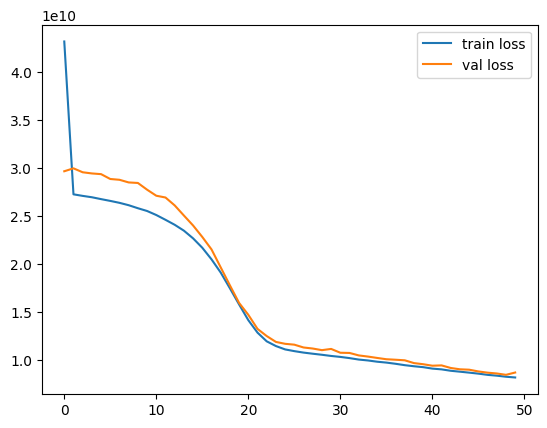

In [53]:
plt.plot(history.history["loss"],label='train loss')
plt.plot(history.history["val_loss"], label='val loss')
plt.legend()
plt.show()

In [54]:
# 평가
model.evaluate([x_test[:,2:],x_test[:,:5]],y_test)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 95987.7969 - loss: 9222662144.0000 - mae: 72780.8516


[8536653312.0, 69554.46875, 92394.0078125]

In [55]:
from sklearn.metrics import r2_score
y_pred = model.predict([x_test[:,2:],x_test[:,:5]])
mse = r2_score(y_test,y_pred)
mse

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.35142993927001953

In [56]:
1e10

10000000000.0

- 다층 퍼셉트론
  - 보조출력을 추가

In [58]:
input_wide = tf.keras.layers.Input(shape=[5]) # 5  index : 0~4
input_deep = tf.keras.layers.Input(shape=[6]) # 6  index: 2 ~ 7

norm_wide_layer =  tf.keras.layers.Normalization()
norm_deep_layer = tf.keras.layers.Normalization()

h1 = tf.keras.layers.Dense(30,activation="relu")
h2 = tf.keras.layers.Dense(30,activation="relu")

concat = tf.keras.layers.Concatenate()
output = tf.keras.layers.Dense(1)
output_ex = tf.keras.layers.Dense(1)

# 결합
input_w = input_wide
norm_wide = norm_wide_layer(input_w)

input_d = input_deep
x = norm_deep_layer(input_d)
x = h1(x)
x = h2(x)
con = concat([x,norm_wide])
out = output(con)
# 보조출력
out_ex = output_ex(x)

model = tf.keras.Model(inputs=[input_d,input_w],outputs=[out,out_ex])

In [64]:
model.compile(loss=('mse','mse'),loss_weights=(0.9,0.1),optimizer='adam',metrics=["mse","RootMeanSquaredError"])

In [65]:
model.fit([x_train[:,2:],x_train[:,:5]],
 [y_train,y_train],epochs=50,
          validation_data=([x_val[:,2:],x_val[:,:5]],[y_val,y_val])
          )

Epoch 1/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - dense_23_mse: 50748530688.0000 - dense_24_RootMeanSquaredError: 226464.8438 - loss: 50812956672.0000 - val_dense_23_mse: 30548944896.0000 - val_dense_24_RootMeanSquaredError: 172802.6406 - val_loss: 30480128000.0000
Epoch 2/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_23_mse: 28435472384.0000 - dense_24_RootMeanSquaredError: 168277.5000 - loss: 28425773056.0000 - val_dense_23_mse: 30090201088.0000 - val_dense_24_RootMeanSquaredError: 173064.4688 - val_loss: 30076315648.0000
Epoch 3/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - dense_23_mse: 26643009536.0000 - dense_24_RootMeanSquaredError: 163263.7500 - loss: 26644801536.0000 - val_dense_23_mse: 29505994752.0000 - val_dense_24_RootMeanSquaredError: 171767.1094 - val_loss: 29505787904.0000
Epoch 4/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - dense_23_mse: 26886502400.0000 - dense_24_RootMeanSquaredError: 164013.3594 - loss: 26888398848.0000 - val_dense_23_mse: 29134626816.000

In [66]:
model.evaluate([x_test[:,2:],x_test[:,:5]],[y_test,y_test])

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - dense_23_mse: 8224753152.0000 - dense_24_RootMeanSquaredError: 90737.8672 - loss: 8226352128.0000


[7699966976.0, 7698736640.0, 87812.609375]

In [67]:
r2_score(y_test,model.predict([x_test[:,2:],x_test[:,:5]])[0])

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.41509050130844116

일반 deep 러닝과 비교

In [68]:
input = tf.keras.layers.Input(shape=[8])
norm =  tf.keras.layers.Normalization()

h1 = tf.keras.layers.Dense(30,activation="relu")
h2 = tf.keras.layers.Dense(30,activation="relu")
out = tf.keras.layers.Dense(1)

# 결합
input = input
x = norm(input)
x = h1(x)
x = h2(x)
output = out(x)
model = tf.keras.Model(inputs=input,outputs=output)

model.compile(loss='mse',optimizer='adam',metrics=["RootMeanSquaredError"])
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - RootMeanSquaredError: 221822.8438 - loss: 49369796608.0000 - val_RootMeanSquaredError: 169991.7656 - val_loss: 28897202176.0000
Epoch 2/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 161376.3594 - loss: 26046953472.0000 - val_RootMeanSquaredError: 166747.0938 - val_loss: 27804594176.0000
Epoch 3/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 155331.1875 - loss: 24131500032.0000 - val_RootMeanSquaredError: 161156.3594 - val_loss: 25971374080.0000
Epoch 4/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 154679.6719 - loss: 23938058240.0000 - val_RootMeanSquaredError: 155668.3281 - val_loss: 24232628224.0000
Epoch 5/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 147734.3906 - loss: 21831241728.0000 - val_RootMeanSquaredError: 147127.3125 - val_loss: 21646446592.0000
Epoch 6/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 138793.5156 - 

In [69]:
r2_score(y_test,model.predict(x_test))

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


0.43667954206466675

- 체크포인트 & 조기종료
  - 조기종료는 학습이 더이상 효과가 없을때 종료
  - 체크포인트 매학습마다 가중치를 조사해서 최상의 가중치를 저장

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
fmnist = tf.keras.datasets.fashion_mnist.load_data()
X = fmnist[0][0]
y = fmnist[0][1]
x_train_full,x_test,y_train_full,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train_full,y_train_full,test_size=0.2,random_state=42)

In [3]:
X.shape, y.shape

((60000, 28, 28), (60000,))

In [5]:
# 층을 설계
input = tf.keras.layers.Input(shape=X.shape[1:]) #(28,28)
norm =  tf.keras.layers.Normalization()
flatten = tf.keras.layers.Flatten()
h1 = tf.keras.layers.Dense(30,activation="relu")
h2 = tf.keras.layers.Dense(30,activation="relu")
out = tf.keras.layers.Dense(10,activation="softmax")

# 결합
input = input
x = norm(input)
x = flatten(x)
x = h1(x)
x = h2(x)
output = out(x)
model = tf.keras.Model(inputs=input,outputs=output)
# 컴파일
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
# 콜백
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.keras",save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

# 학습
model.fit(x_train,y_train,epochs=5000,validation_data=(x_val,y_val),callbacks=[checkpoint_cb,early_stopping_cb])
# 모델불러오기
best_model = tf.keras.models.load_model("my_keras_model.keras")
# 모델 평가
best_model.evaluate(x_test,y_test)

Epoch 1/5000
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4203 - loss: 6.9212 - val_accuracy: 0.6285 - val_loss: 1.0277
Epoch 2/5000
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6722 - loss: 0.8849 - val_accuracy: 0.7015 - val_loss: 0.7650
Epoch 3/5000
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6939 - loss: 0.7570 - val_accuracy: 0.6999 - val_loss: 0.7999
Epoch 4/5000
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6942 - loss: 0.7519 - val_accuracy: 0.7131 - val_loss: 0.7210
Epoch 5/5000
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7093 - loss: 0.7225 - val_accuracy: 0.7145 - val_loss: 0.7139
Epoch 6/5000
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7180 - loss: 0.6878 - val_accuracy: 0.7269 - val_loss: 0.6747
Epoch 7/5000
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7231 - loss: 0.6872 - val_accuracy: 0.7404 - val_loss: 0.6367
Epoch 8/5000
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7280 -

[0.5406382083892822, 0.8075833320617676]

In [7]:
best_model.evaluate(x_test,y_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8070 - loss: 0.5597


[0.5406382083892822, 0.8075833320617676]

- 파이토치
   - 오픈소스 라이브러리
   - 자동미분, 텐서 연산, 신경망 구축
   - 텐서
    - 다차원 배열 (스칼라, 벡터, 행렬)
      - 스칼라 : 0텐서  단일숫자
      - 벡터 : 1텐서  배열
      - 행렬 : 2텐서  2차원 배열
      - 3텐서.. 4텐서...


In [10]:
import torch
# scalar
scalar = torch.tensor(7)
scalar + 100

tensor(107)

In [12]:
# 벡터
vector = torch.tensor([1,2,3,4,5])
vector + vector

tensor([ 2,  4,  6,  8, 10])

In [13]:
# 행렬
matrix = torch.tensor([[1,2,3],[4,5,6]])
matrix

tensor([[1, 2, 3],
        [4, 5, 6]])

In [18]:
# 텐서는 gpu연산을 지원
# 텐서를 gpu 이동해서 연산
device = 'cuda' if torch.cuda.is_available() else "cpu"
print(f"device is {device}")
m_gpu = matrix.to(device)
print(m_gpu)
m_cpu = m_gpu.cpu()
print(m_cpu)

device is cuda
tensor([[1, 2, 3],
        [4, 5, 6]], device='cuda:0')
tensor([[1, 2, 3],
        [4, 5, 6]])


In [21]:
# 모양... 1차원 -> 2차원
# 넘파이  reshape, shape
# 텐서의 차원변경
matrix.shape, matrix.reshape(3,2), matrix.view(3,2)

(torch.Size([2, 3]),
 tensor([[1, 2],
         [3, 4],
         [5, 6]]),
 tensor([[1, 2],
         [3, 4],
         [5, 6]]))

- 자동미분

In [23]:
x = torch.tensor(2.0,requires_grad=True)
# 함수
y = x**2 + 3*x + 1   # 2*x + 3
# 미분  (y에 대한 x의 기울기)
y.backward()
# 미분값( 기울기)
x.grad  # dy/dx

tensor(7.)

In [24]:
# 여러개의 변수에 대한 기울기 계산
a = torch.tensor(3.0,requires_grad=True)
b = torch.tensor(4.0,requires_grad=True)
z = a*b+ a**2 + b**2
z.backward()

a.grad, b.grad


(tensor(10.), tensor(11.))

In [25]:
# 파이토치를 이용한 경사하강법으로 예측
# 사인곡선을 예측

In [26]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# 데이터생성  -p ~ p 사이의 점을 균등분포로 1000개
x = torch.linspace(-math.pi,math.pi,10000)
y = torch.sin(x)

In [102]:
# 사인함수는 3차원 함수
a,b,c,d = torch.rand(()),torch.rand(()),torch.rand(()),torch.rand(())
z = a*x**3 + b*x**2 + c*x + d

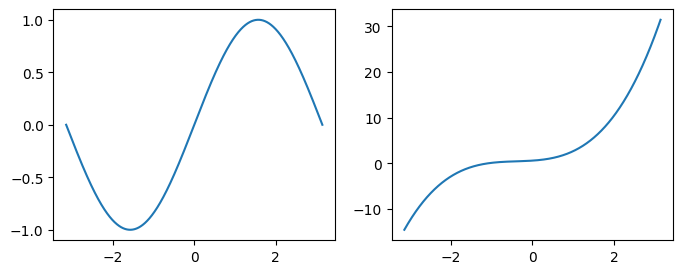

In [33]:
# 실제와 임의의 가중치로만든 함수의 그래프
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(x,y)
plt.subplot(1,2,2)
plt.plot(x,z)

In [93]:
x = torch.linspace(-math.pi,math.pi,10000)
y = torch.sin(x)

a,b,c,d = torch.rand(()),torch.rand(()),torch.rand(()),torch.rand(())

lr_rate = 1e-7 # 학습률 정의

for epoch in range(10000): # 학습 2000번 진행
   y_pred = a * x**3 + b * x**2 + c * x + d

   loss = (y_pred - y).pow(2).sum().item() #  손실 정의
   if epoch % 1000 == 99:
    print(f"epoch{epoch+1} loss:{loss}")

   grad_y_pred = 2.0 * (y_pred - y) #  기울기의 미분값
   grad_a = (grad_y_pred * x ** 3).sum()
   grad_b = (grad_y_pred * x ** 2).sum()
   grad_c = (grad_y_pred * x).sum()
   grad_d = grad_y_pred.sum()

   a -= lr_rate * grad_a #  가중치 업데이트
   b -= lr_rate * grad_b
   c -= lr_rate * grad_c
   d -= lr_rate * grad_d

epoch100 loss:1932.5557861328125
epoch1100 loss:281.5458679199219
epoch2100 loss:74.9469223022461
epoch3100 loss:48.026634216308594
epoch4100 loss:44.484378814697266
epoch5100 loss:44.0123405456543
epoch6100 loss:43.94841766357422
epoch7100 loss:43.93958282470703
epoch8100 loss:43.938331604003906
epoch9100 loss:43.93815231323242


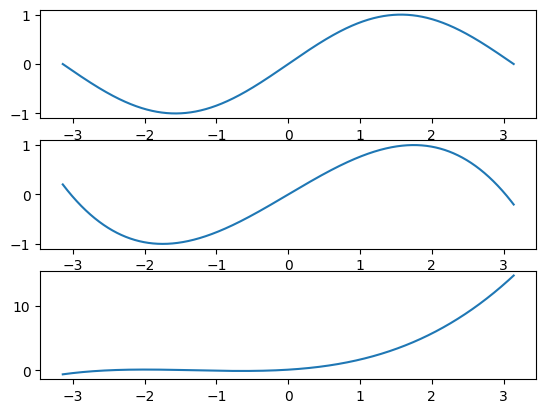

In [104]:
type(x), type(y_pred)
plt.subplot(3,1,1)
plt.plot(x,y)

plt.subplot(3,1,2)
plt.plot(x.detach().numpy(),y_pred.detach().numpy())

plt.subplot(3,1,3)
plt.plot(x,z)

- 위의 수식을 파이토치의 자동미분을 이용

In [94]:
x = torch.linspace(-math.pi,math.pi,10000)
y = torch.sin(x)
# 가중치 초기화
a,b = torch.rand((),requires_grad=True),torch.rand((),requires_grad=True)
c,d = torch.rand((),requires_grad=True),torch.rand((),requires_grad=True)
lr_rate = 1e-7 # 학습률 정의

for epoch in range(10000): # 학습 2000번 진행
  y_pred = a * x**3 + b * x**2 + c * x + d

  loss = (y_pred - y).pow(2).sum() #  손실 정의
  if epoch % 1000 == 99:
    print(f"epoch{epoch+1} loss:{loss}")
  # 기울기 계산
  loss.backward()
  # 가중치 업데이트
  with torch.no_grad():  # 매 학습마다 가중치를 초기화
    a -= lr_rate * a.grad
    b -= lr_rate * b.grad
    c -= lr_rate * c.grad
    d -= lr_rate * d.grad
  # 기울기 초기화
  a.grad.zero_()
  b.grad.zero_()
  c.grad.zero_()
  d.grad.zero_()

epoch100 loss:2691.130859375
epoch1100 loss:381.2613830566406
epoch2100 loss:87.11216735839844
epoch3100 loss:49.484161376953125
epoch4100 loss:44.654090881347656
epoch5100 loss:44.031185150146484
epoch6100 loss:43.9503288269043
epoch7100 loss:43.93974304199219
epoch8100 loss:43.93833923339844
epoch9100 loss:43.938148498535156


In [36]:
print(1e-3)

0.001
